<h2 style="
    background-color: #4CAF50; 
    color: white; 
    padding: 15px; 
    border-radius: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
">
    Import Libraries
</h2>


In [153]:
# Numerical Computations
import numpy as np  # For numerical computations, especially with arrays

# Data Manipulation and Analysis
import pandas as pd  # For data manipulation and analysis with DataFrames

# Data Visualization
import matplotlib.pyplot as plt  # For creating static visualizations/plots
import seaborn as sns  # For statistical data visualization (built on matplotlib)
import plotly.express as px  # For interactive visualizations
import plotly.graph_objects as go  # For creating more complex interactive plots with Plotly
import plotly.offline as pyo  # For initializing Plotly in offline mode
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds from text data

# String and File Handling
import re  # For regular expressions, useful in string manipulation and searching
import os  # For interacting with the operating system (e.g., file handling)
import zipfile  # For working with ZIP files

# Machine Learning and NLP
import torch  # For deep learning, tensors, and neural networks
from torch.utils.data import DataLoader, TensorDataset  # For handling datasets and creating data loaders
from transformers import BertForSequenceClassification, BertTokenizer, AdamW  # For NLP tasks using BERT model
from sklearn.model_selection import train_test_split  # For splitting datasets into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score  # For evaluating model performance

<h2 style="
    background-color: #4CAF50; 
    color: white; 
    padding: 15px; 
    border-radius: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
">
    Load and Exploring the Dataset
</h2>


In [154]:
df_train = pd.read_csv("train.csv")

In [155]:
df_train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<div style="font-family: Arial, sans-serif; background-color:#1e1e2f; padding: 15px; border-radius: 8px; color: #e0e0e0;">
    <p>Let's check what each label means:</p>
    <ol>
        <li><span style="font-style:italic; color:#FF6F61;">toxic</span> - very unpleasant or unacceptable words</li>
        <li><span style="font-style:italic; color:#FF6F61;">severe − toxic</span> - like toxic but with more aggression and expression</li>
        <li><span style="font-style:italic; color:#FF6F61;">obscene</span> - relates to sex or violence in a way that you think is unpleasant and shocking</li>
        <li><span style="font-style:italic; color:#FF6F61;">threat</span> - language or content that could be interpreted as a threat to harm someone or something</li>
        <li><span style="font-style:italic; color:#FF6F61;">insult</span> - expression, statement, or behavior that is often deliberately disrespectful, offensive</li>
        <li><span style="font-style:italic; color:#FF6F61;">identity − hate</span> - hateful posts about a person or group based on their race, religion, ethnicity</li>
    </ol>
</div>


In [156]:
stopwords = ["the", "and", "is", "on", "in", "if", "for", "a", "an", "of", "or", "to", "it", "you", "your"]

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stopwords)

    return text.lower()

# Example usage with the provided text
texts = [
    "\nMore\nI can't make any       real sugges%%%%%tions on improvement - I wondered if the section statistics should b|e later on, or a subsect\nion of 'types of accidents'  -I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport"
]

cleaned_texts = [clean_text(text) for text in texts]
print(cleaned_texts)

['more i cant make any real suggestions improvement i wondered section statistics should be later subsect ion types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wikipediagoodarticlenominationstransport']


In [157]:
df_train['Cleaned_Comments'] = df_train['comment_text'].apply(clean_text)
df_train['Cleaned_Comments'].head()

0    explanation why edits made under my username h...
1    daww he matches this background colour im seem...
2    hey man im really not trying edit war its just...
3    more i cant make any real suggestions improvem...
4    sir are my hero any chance remember what page ...
Name: Cleaned_Comments, dtype: object

In [158]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

In [159]:
target_labels= [col for col in df_train.columns if df_train[col].dtypes == 'int64']
target_labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [160]:
df_train['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [161]:
df_train.sort_values(by = ['toxic'], ascending = False).head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
83844,e061b485cfa88d4e,Vandalism of my user page \n\nPlease do not va...,1,0,1,0,1,0,vandalism my user page please do not vandalize...
145225,190748c37c8dc159,"Douche bag, know the band Sublime before you t...",1,0,1,0,1,0,douche bag know band sublime before tell me th...
54826,9284484fe7d8fdd9,Interesting fact \n\nYou're a huge fucking too...,1,0,1,0,1,0,interesting fact youre huge fucking tool suck ...
35554,5f0120e927cf78d9,"""::What point do you think you have? There's w...",1,0,0,0,0,0,what point do think have theres whole article ...
145216,18f35bf40d79d277,FUCK YOU!!!! stupid IGNORANT!!!!! \n\nHIM\nis ...,1,0,1,0,0,0,fuck stupid ignorant him love metal band
145220,18fd5b4427dd0b33,Why are you being such a nigger lover/faggot a...,1,0,1,0,1,0,why are being such nigger loverfaggot revertin...
15868,29e73351002d063c,THE LINK IS THERE. I have an idea. Why not del...,1,0,1,0,1,0,link there i have idea why not delete page the...
95543,ff7cd88f0588f00d,"Shit I hate you, you pompous bastard. 110.32.1...",1,0,1,0,1,0,shit i hate pompous bastard
95542,ff7ab6da3cce3b07,"fisrt, ANYONE WHO BELEIVES THIS CRAP IS A FOOL",1,0,1,0,0,0,fisrt anyone who beleives this crap fool
127494,a9df5f43821cb576,I'm the bigot? you are a pathetic racist Afroc...,1,0,0,0,1,1,im bigot are pathetic racist afrocentrist who ...


In [162]:
df_train.sort_values(by = ['severe_toxic'], ascending = False).head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
109469,497c6f9584ca4fd6,FUCK YOU WHORES! I'LL ALWAYS COME BACK AGAIN A...,1,1,1,0,1,1,fuck whores ill always come back again again f...
51977,8b21c008d3af37da,"""\n\n Go fuck yourself!! \n\n fuck you """,1,1,1,0,1,0,go fuck yourself fuck
121230,88ab08f18eb79dd3,"""\n\n You fucking no-life car fetishist \n\nSi...",1,1,1,0,1,1,fucking nolife car fetishist since its obvious...
51970,8b1e6f64cd2e05df,SMELL MY ARSE\n\nPROJECTILE VOMIT INTO MY GAPI...,1,1,1,0,1,0,smell my arse projectile vomit into my gaping ...
110920,516e733a14410cd8,why? ==\nare you such a stupid bitch?\n\n==,1,1,1,0,1,0,why are such stupid bitch
140800,f1749c3c09f560a7,"N ALL U BITCHES SO YEAH, WE DONT SPEAK GERMAN,...",1,1,1,0,1,0,n all u bitches so yeah we dont speak german w...
123740,95ca65d4cd31d3dd,HOPE YOUR HEAD GETS CUT OFF AND SOMEONE WIPES ...,1,1,1,1,1,0,hope head gets cut off someone wipes there ass...
36202,60b73307c861a218,suck my hairy plums you fagggot,1,1,1,0,1,0,suck my hairy plums fagggot
31680,5426706d85d65028,"Nuisance piece of shit, fuck off, wiki doesn't...",1,1,1,0,1,0,nuisance piece shit fuck off wiki doesnt need ...
68257,b69887f4b18c2cf8,"Dont worry, I'll unplug my router tonite to ge...",1,1,1,0,1,0,dont worry ill unplug my router tonite get ano...


In [163]:
df_train['comment_text'][109469]

"FUCK YOU WHORES! I'LL ALWAYS COME BACK AGAIN AND AGAIN TO FUCK YOU BITCHES UP!! HAHAHAHA"

In [164]:
df_train.sort_values(by = ['obscene'], ascending = False).head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
145777,22185063a63b6f06,OK. Then go ahead and block me. My people has ...,1,0,1,0,1,0,ok then go ahead block me my people has been c...
110612,4fb6da5f08c6718e,then how come he is allways refered to as a se...,1,0,1,0,1,0,then how come he allways refered as serial kil...
33732,59eee300dc034172,please delete my account i dont respect wikipe...,1,0,1,0,0,0,please delete my account i dont respect wikipe...
133662,cb20e7c5fe36ec0f,BULLSHIT \nUNBLOCK 195.93.21.74 NOW OR IM GONN...,1,0,1,0,1,0,bullshit unblock now im gonna fuck about with ...
11818,1f41d9656865dffa,MotherFucker i have static ip address connecti...,1,0,1,0,1,0,motherfucker i have static ip address connecti...
6503,1164d666808b62fc,"Yep, and after you vandalized it again, I re-r...",1,0,1,0,0,0,yep after vandalized again i rereverted dipshit
76126,cbc8c19acb2d8e5e,please stop your oppressive editing\nHi. I see...,1,0,1,0,0,0,please stop oppressive editing hi i see that y...
30136,5006ae17430bc5b5,Please refrain from unmaking unconstructive ed...,1,0,1,0,1,0,please refrain from unmaking unconstructive ed...
6506,1166ba7734473382,"""\n\nReply from ColonelHenry\nI have been piss...",1,0,1,0,0,0,reply from colonelhenry i have been pissed thi...
123587,950bb8240a93ef11,"""\n\n Censorship \n\nWas Final Fantasy VII cen...",1,0,1,0,0,0,censorship was final fantasy vii censored at a...


In [165]:
df_train['comment_text'][76126]

"please stop your oppressive editing\nHi. I see that you're not as stupid as the other sysop, trying to block ip addresses and stuff. But all my warnings apply to you too. And if you're still wondering what this is about or who the fuck I am, you know what to do. Just do a whois on my ip117.201.39.75"

In [166]:
df_train.sort_values(by = ['threat'], ascending = False).head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
147426,3c36f6b4bd692ab5,FUCK U CAMEROON\n\nPROTECING ILLEGAL EDITS BY ...,1,0,1,1,1,0,fuck u cameroon protecing illegal edits by moh...
57852,9ade615b4724e01b,"Dick \n\nHey, dick.\n\nWhy don't you go read t...",1,0,1,1,1,0,dick hey dick why dont go read aqua teen hunge...
39374,69123690b8d730c4,You leave my friend's editing alone! \n\nHello...,1,0,0,1,0,0,leave my friends editing alone hello davejohns...
158856,f4dca9e513e0366f,"Hey \n\nhey faggot, are you dead yet? or are y...",1,1,1,1,1,0,hey hey faggot are dead yet are watching mom g...
82030,db7088509704e2da,what the hell!!!! \n\nwhat the hell is your fu...,1,0,1,1,1,0,what hell what hell fucking problem i am going...
128982,b1c44d21505cb51b,unblock input devices now u cunt or ill kill y...,1,0,1,1,0,0,unblock input devices now u cunt ill kill ya d...
32016,5517265668c5a7d8,Do not ever send me a message again i will hun...,1,0,0,1,0,0,do not ever send me message again i will hunt ...
37978,6564fba30dcff2df,__________________________\nListen piece of ba...,1,0,1,1,1,0,listen piece bastard yo have chance read this ...
131620,c03506c597f34085,I will force you to eat dog poop. \n\nIt will ...,1,0,1,1,1,0,i will force eat dog poop will be funny watchi...
89334,eef4a004cdb68696,I AM GONNA CUT OFF ZHANZHAO'S FUCKING INDIAN-C...,1,0,1,1,1,1,i am gonna cut off zhanzhaos fucking indianchi...


In [167]:
df_train['comment_text'][131620]

'I will force you to eat dog poop. \n\nIt will be funny watching you gag and vomit with crap smeared all over your face.'

In [168]:
df_train.sort_values(by = ['insult'], ascending = False).head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
108757,45801eb54a7389a2,"He's gay. Trust me. Really, really gay. ****",0,0,0,0,1,0,hes gay trust me really really gay
57366,99638bf75daceecc,Ccwaters is still a fuck \n\nYou're still a fu...,1,0,1,0,1,0,ccwaters still fuck youre still fuck good luck...
6170,107726c474021958,Wanker \n\nCharles Knight is a complete arse w...,1,0,1,0,1,0,wanker charles knight complete arse wipe
153726,a19ef2e24aa6a382,PHUCK YOU \n\nPHUCK YOU,1,0,1,0,1,0,phuck phuck
33662,59be56b9298cf59c,JAMES THE AWESOME TECHNICIAN did create the e-...,1,0,1,0,1,0,james awesome technician did create elearnign ...
76260,cc239a00b1127cfb,Please stop your crony bullshit. I didn't atta...,1,0,1,0,1,0,please stop crony bullshit i didnt attack anyo...
37978,6564fba30dcff2df,__________________________\nListen piece of ba...,1,0,1,1,1,0,listen piece bastard yo have chance read this ...
141005,f27fca812d1716b7,That is utter bullshit and you know it. I left...,1,0,1,0,1,0,that utter bullshit know i left message admins...
114403,63e17b813e9a138a,"No not really, I picked the name to wind up th...",1,0,1,0,1,0,no not really i picked name wind up pira suppo...
105041,31e6f99f08d55c4a,faggot faggot faggot faggot faggot faggot fagg...,1,1,0,0,1,0,faggot faggot faggot faggot faggot faggot fagg...


In [169]:
df_train['comment_text'][108757]

"He's gay. Trust me. Really, really gay. ****"

In [170]:
df_train.sort_values(by = ['identity_hate'], ascending = False).head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
98699,0ffcf54b64ed189a,a gay a big fat gay. this page has no,1,1,0,0,1,1,gay big fat gay this page has no
41679,6f31617f31e0cfb2,"o feel sorry for you, fuck off you american ba...",1,1,1,0,1,1,o feel sorry fuck off american bastard
61087,a38e01fe6e506cc6,You also want eternal hell???\n\n‘chaitanya-ma...,0,0,0,0,0,1,also want eternal hell chaitanyamangala shune ...
155771,c35fa79b4feb3d92,"And another thing, stay off Macedonians (ethni...",1,0,1,0,1,1,another thing stay off macedonians ethnic grou...
73682,c52bef26cbc5833c,shitty nigger fuck i love d3$1r# (@/\/+u shitt...,1,1,1,0,1,1,shitty nigger fuck i love dr u shitty nigger f...
33341,58da6f5c58ba57c1,American mouths are way too faster than Americ...,1,0,0,0,0,1,american mouths are way too faster than americ...
95886,00d3977da5c49e6a,Fucking Faggot\n\nThis guy is a total fucking ...,1,1,1,0,1,1,fucking faggot this guy total fucking faggot
118316,783bf6be5dd88278,"o why dont u get off my mothafuckin dick son, ...",1,1,1,0,1,1,o why dont u get off my mothafuckin dick son u...
73687,c530ff93bcc45cd1,wateva minga mc donalds worker\nu r a fuckin p...,1,1,1,0,1,1,wateva minga mc donalds worker u r fuckin paed...
41631,6f0bbd2777216413,Black americans have a hive mind mentality and...,0,0,0,0,0,1,black americans have hive mind mentality autom...


In [171]:
comments=df_train['Cleaned_Comments'].to_list()
comments[:5]

['explanation why edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure some gas after i voted at new york dolls fac please dont remove template from talk page since im retired now',
 'daww he matches this background colour im seemingly stuck with thanks talk january utc',
 'hey man im really not trying edit war its just that this guy constantly removing relevant information talking me through edits instead my talk page he seems care more about formatting than actual info',
 'more i cant make any real suggestions improvement i wondered section statistics should be later subsection types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wiki

In [172]:
df_train['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

<h2 style="
    background-color: #4CAF50; 
    color: white; 
    padding: 15px; 
    border-radius: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
">
    Preprocessing
</h2>


In [173]:
# Function to generate a word cloud from the provided text
def generate_wordcloud(text, Title):
    # Create a WordCloud object with specified width, height, stopwords, and background color
    wordcloud = WordCloud(width=800, height=400, stopwords=set(STOPWORDS), background_color='black').generate(text)
    
    # Set the figure size for displaying the word cloud
    plt.figure(figsize=(10, 5))
    
    # Display the word cloud image with bilinear interpolation for smoother transitions
    plt.imshow(wordcloud, interpolation='bilinear')
    
    # Remove axis labels for a cleaner look
    plt.axis("off")
    
    # Set the title of the word cloud plot
    plt.title(Title)
    
    # Show the plot
    plt.show()


In [174]:
target_labels= [col for col in df_train.columns if df_train[col].dtypes == 'int64']
target_labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [175]:
df_train[target_labels].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

<h2 style="
    background-color: #4CAF50; 
    color: white; 
    padding: 15px; 
    border-radius: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
">
    Visualizing 
</h2>


In [176]:
comments = df_train['Cleaned_Comments'].to_list()
comments[:5]

['explanation why edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure some gas after i voted at new york dolls fac please dont remove template from talk page since im retired now',
 'daww he matches this background colour im seemingly stuck with thanks talk january utc',
 'hey man im really not trying edit war its just that this guy constantly removing relevant information talking me through edits instead my talk page he seems care more about formatting than actual info',
 'more i cant make any real suggestions improvement i wondered section statistics should be later subsection types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wiki

In [177]:
# Calculate the value counts for each target label
value_counts = df_train[target_labels].sum()

# Add the count for the "neither" category (where all target labels are 0)
value_counts['Good Comments'] = len(df_train) - value_counts.sum()

fig =px.bar(x= value_counts.index,
            y= value_counts.values,
            color=value_counts.index,
            color_discrete_sequence =  px.colors.qualitative.Dark24_r,
            title='<b>Counts of Target Labels')

fig.update_layout(title='Counts of Target Labels',
                  xaxis_title='Toxicity Labels',
                  yaxis_title='Counts',
                  template='plotly_dark')

# Show the bar chart
fig.show()
pyo.plot(fig, filename = 'Counts of Target Labels.html', auto_open = True)

'Counts of Target Labels.html'

<Axes: title={'center': 'Correlation of features & targets'}>

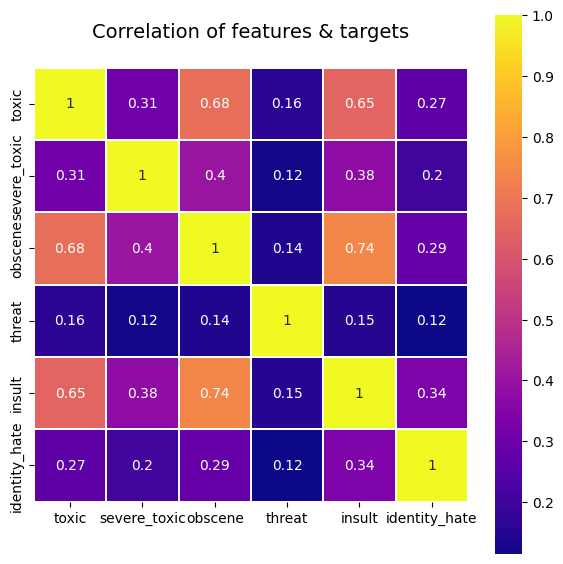

In [178]:
# Select the data corresponding to the target labels from the dataframe
data = df_train[target_labels]

# Choose a colormap for the heatmap (in this case, 'plasma')
colormap = plt.cm.plasma

# Set up the figure size for the heatmap
plt.figure(figsize=(7, 7))

# Set the title for the heatmap plot
plt.title('Correlation of features & targets', y=1.05, size=14)

# Create a heatmap to visualize the correlation matrix of the selected data
sns.heatmap(data.astype(float).corr(),  # Compute the correlation matrix of the data
            linewidths=0.1,            # Set the width of the lines that divide cells in the heatmap
            vmax=1.0,                  # Set the maximum value for the colormap
            square=True,               # Ensure that each cell is square-shaped
            cmap=colormap,             # Apply the chosen colormap
            linecolor='white',          # Set the color of the lines dividing the cells
            annot=True)                # Annotate each cell with the correlation value


<h3>Key Observations:</h3>

<h4>High Correlation Pairs:</h4>
<ul>
    <li><strong>Obscene and Insult (0.74)</strong>: These two categories are strongly correlated, indicating that content labeled as "obscene" is often also labeled as "insult."</li>
    <li><strong>Toxic and Obscene (0.68)</strong>: There is a significant overlap between content labeled as "toxic" and "obscene."</li>
    <li><strong>Toxic and Insult (0.65)</strong>: Similarly, content labeled as "toxic" is often also labeled as "insult."</li>
</ul>

<h4>Moderate Correlations:</h4>
<ul>
    <li><strong>Severe_toxic and Obscene (0.4)</strong>: There is a moderate correlation, suggesting some overlap between these categories.</li>
    <li><strong>Severe_toxic and Insult (0.38)</strong>: This correlation is also moderate, indicating a relationship between these categories.</li>
</ul>

<h4>Low Correlation Pairs:</h4>
<ul>
    <li><strong>Threat with other labels</strong>: The "threat" category has generally low correlations with other categories, which might suggest it is more distinct compared to others.</li>
</ul>


In [179]:
output_counts = df_train["toxic"].value_counts()

# Build the pie chart
fig = px.pie(values=output_counts, 
             names=["None toxic", 'toxic'],
             title="Toxicology Distribution")
fig.show()

In [180]:
output_counts = df_train["severe_toxic"].value_counts()

# Build the pie chart
fig = px.pie(values=output_counts, 
             names=["None severe toxic", 'severe toxic'],
             
             title="Severe toxicology Distribution")
fig.show()

In [181]:
output_counts = df_train["obscene"].value_counts()

# Build the pie chart
fig = px.pie(values=output_counts, 
             names=["None obscene", 'obscene'],
             
             title="Obscenity Distribution")
fig.show()

In [182]:
output_counts = df_train["threat"].value_counts()

# Build the pie chart
fig = px.pie(values=output_counts, 
             names=["None threat", 'toxic'],
             title="Threat Distribution")
fig.show()

In [183]:
output_counts = df_train["insult"].value_counts()

# Build the pie chart
fig = px.pie(values=output_counts, 
             names=["None insult", 'insult'],
             title="Insult Distribution")
fig.show()

In [184]:
output_counts = df_train["identity_hate"].value_counts()

# Build the pie chart
fig = px.pie(values=output_counts, 
             names=["None identity_hate", 'identity_hate'],
             title="Identity hate Distribution")
fig.show()

<h2 style="
    background-color: #4CAF50; 
    color: white; 
    padding: 15px; 
    border-radius: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
">
    Split the Dataset into Train, Test and Validation
</h2>


In [185]:
comments=df_train['Cleaned_Comments'].to_list()
comments[:5]

['explanation why edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure some gas after i voted at new york dolls fac please dont remove template from talk page since im retired now',
 'daww he matches this background colour im seemingly stuck with thanks talk january utc',
 'hey man im really not trying edit war its just that this guy constantly removing relevant information talking me through edits instead my talk page he seems care more about formatting than actual info',
 'more i cant make any real suggestions improvement i wondered section statistics should be later subsection types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wiki

In [186]:
# Split data into training and testing sets
# Train_texts, Test_texts will contain the comments (texts) split into training and testing subsets
# Train_labels, Test_labels will contain the corresponding labels for those texts
Train_texts, Test_texts, Train_labels, Test_labels = train_test_split(
    comments,                         # The comments or text data
    df_train[target_labels].values,      # The labels corresponding to the target features
    test_size=0.2,                    # 20% of the data will be used as the test set
    random_state=2023                 # Seed for reproducibility
)

# Further split the test set into validation and final test sets
# test_texts, val_texts will contain the comments (texts) split into testing and validation subsets
# test_labels, val_labels will contain the corresponding labels for those texts
test_texts, val_texts, test_labels, val_labels = train_test_split(
    Test_texts,                       # The test texts from the first split
    Test_labels,                      # The corresponding labels
    test_size=0.5,                    # 50% of the test set will be used for validation, the other 50% will remain as test
    random_state=23                   # Seed for reproducibility
)

# Print the number of examples in each dataset
print('Number of training examples:', len(Train_texts))
print('Number of testing examples:', len(test_texts))
print('Number of validation examples:', len(val_texts))


Number of training examples: 127656
Number of testing examples: 15957
Number of validation examples: 15958


<h2 style="
    background-color: #4CAF50; 
    color: white; 
    padding: 15px; 
    border-radius: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
">
    Fine-tune Bert Model for Multilabel Classification 
</h2>


In [187]:
def tokenize_and_encode(tokenizer, comments, labels, max_length=128):
    # Initialize empty lists to store tokenized inputs and attention masks
    input_ids = []
    attention_masks = []

    # Iterate through each comment in the 'comments' list
    for comment in comments:
        # Tokenize and encode the comment using the BERT tokenizer
        encoded_dict = tokenizer.encode_plus(
            comment,                      # The comment to be tokenized
            add_special_tokens=True,      # Add [CLS] and [SEP] tokens
            max_length=max_length,        # Maximum length of the sequence
            pad_to_max_length=True,       # Pad sequences to the maximum length
            return_attention_mask=True,   # Generate the attention mask (1 for real tokens, 0 for padding)
            return_tensors='pt'           # Return PyTorch tensors
        )

        # Append the tokenized input and attention mask to their respective lists
        input_ids.append(encoded_dict['input_ids'])           # Tokenized input IDs
        attention_masks.append(encoded_dict['attention_mask'])# Corresponding attention mask

    # Convert the lists of tokenized inputs and attention masks to PyTorch tensors
    input_ids = torch.cat(input_ids, dim=0)  # Concatenate list of tensors into a single tensor
    attention_masks = torch.cat(attention_masks, dim=0)  # Same for attention masks

    # Convert the labels to a PyTorch tensor with the data type float32
    labels = torch.tensor(labels, dtype=torch.float32)  # Convert labels to tensor

    # Return the tokenized inputs, attention masks, and labels as PyTorch tensors
    return input_ids, attention_masks, labels

In [188]:
from transformers import logging
logging.set_verbosity_error()

In [189]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Example of encoding and decoding text with explicit setting
encoded_input = tokenizer.encode("Your text here", add_special_tokens=True)
decoded_output = tokenizer.decode(encoded_input, clean_up_tokenization_spaces=True)


In [190]:
import torch.nn as nn
import torch.nn.init as init
from transformers import BertForSequenceClassification

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

# Custom weight initialization
def init_weights(module):
    if isinstance(module, nn.Linear):
        init.xavier_uniform_(module.weight)
        if module.bias is not None:
            init.zeros_(module.bias)

# Apply the custom initialization
model.classifier.apply(init_weights)

# Continue with training as before


Linear(in_features=768, out_features=6, bias=True)

In [191]:
import warnings
warnings.filterwarnings("ignore", message="A parameter name that contains `beta` will be renamed internally to `bias`")
warnings.filterwarnings("ignore", message="A parameter name that contains `gamma` will be renamed internally to `weight`")


In [192]:
# Model Initialization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

In [193]:
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model =model.to(device)

cuda


In [194]:
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model =model.to(device)

cuda


In [195]:
# Tokenize and Encode the comments and labels for the training set
input_ids, attention_masks, labels = tokenize_and_encode(
    tokenizer, 
    Train_texts, 
    Train_labels
)

# Step 4: Tokenize and Encode the comments and labels for the test set
test_input_ids, test_attention_masks, test_labels = tokenize_and_encode(
    tokenizer,
    test_texts,
    test_labels
)

# Tokenize and Encode the comments and labels for the validation set
val_input_ids, val_attention_masks, val_labels = tokenize_and_encode(
    tokenizer,
    val_texts,
    val_labels
)

c:\Users\mheidari\Downloads\text_summarize\.conda\Lib\site-packages\transformers\tokenization_utils_base.py:2888: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [196]:
# Creating DataLoader for the balanced dataset
batch_size = 32
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#test
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#val
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [197]:
print('Batch Size :',train_loader.batch_size)
Batch =next(iter(train_loader))
print('Each Input ids shape :',Batch[0].shape)
print('Input ids :\n',Batch[0][0])
print('Corresponding Decoded text:\n',tokenizer.decode(Batch[0][0]))
print('Corresponding Attention Mask :\n',Batch[1][0])
print('Corresponding Label:',Batch[2][0])

Batch Size : 32
Each Input ids shape : torch.Size([32, 128])
Input ids :
 tensor([  101,  2348,  2070,  2122,  2839,  6648,  2015,  2024, 27885,  8043,
        12423,  2060,  4216,  3383,  2122,  2182,  2024,  2062,  5875,  3408,
         2129,  6253,  2001,  8690,  2117,  2431, 16215,  2301,  2738,  2084,
         2004, 15764,  9420,  2755,  2027,  2079,  2025,  4894,  3311,  2108,
        12683,  2913,  2742,  2034,  3120,  2024,  2036,  3205,  2536,  9017,
         4968,  6040,  2107,  2004, 22583,  2040,  2038,  2081,  2817, 21791,
         7216,  2014,  2188,  2038,  2179,  2044,  2146,  3325,  2008,  2025,
         2440,  2791,  2606, 13342,  2229,  2029,  9909,  2037,  7216,  2061,
         2172,  2004,  2485, 10722, 26169,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     

In [198]:
# Optimizer setup
optimizer = AdamW(model.parameters(), lr=0.00005)

c:\Users\mheidari\Downloads\text_summarize\.conda\Lib\site-packages\transformers\optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



C:\Users\mheidari\AppData\Local\Temp\ipykernel_14764\1707863185.py:14: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.

C:\Users\mheidari\AppData\Local\Temp\ipykernel_14764\1707863185.py:25: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Epoch 1, Step 100, Training Loss: 0.07254251837730408
Epoch 1, Step 200, Training Loss: 0.10942758619785309
Epoch 1, Step 300, Training Loss: 0.06258746236562729
Epoch 1, Step 400, Training Loss: 0.047466348856687546
Epoch 1, Step 500, Training Loss: 0.014627743512392044
Epoch 1, Step 600, Training Loss: 0.0334470197558403
Epoch 1, Step 700, Training Loss: 0.10057037323713303
Epoch 1, Step 800, Training Loss: 0.027310483157634735
Epoch 1, Step 900, Training Loss: 0.04749714583158493
Epoch 1, Step 1000, Training Loss: 0.05005276948213577
Epoch 1, Step 1100, Training Loss: 0.06113631650805473
Epoch 1, Step 1200, Training Loss: 0.08339177072048187
Epoch 1, Step 1300, Training Loss: 0.07419630885124207
Epoch 1, Step 1400, Training Loss: 0.03141529858112335
Epoch 1, Step 1500, Training Loss: 0.13018178939819336
Epoch 1, Step 1600, Training Loss: 0.034126147627830505
Epoch 1, Step 1700, Training Loss: 0.05618000030517578
Epoch 1, Step 1800, Training Loss: 0.06090334802865982
Epoch 1, Step 19

C:\Users\mheidari\AppData\Local\Temp\ipykernel_14764\1707863185.py:55: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Epoch 1, Training Loss: 0.052633875542825656, Train Accuracy: 0.9809984123999916, Validation Loss: 0.04263779595900208, Validation Accuracy: 0.9827254877386473
Epoch 2, Step 100, Training Loss: 0.02550199255347252
Epoch 2, Step 200, Training Loss: 0.02577935717999935
Epoch 2, Step 300, Training Loss: 0.015609055757522583
Epoch 2, Step 400, Training Loss: 0.06352175772190094
Epoch 2, Step 500, Training Loss: 0.029337257146835327
Epoch 2, Step 600, Training Loss: 0.034955237060785294
Epoch 2, Step 700, Training Loss: 0.040813080966472626
Epoch 2, Step 800, Training Loss: 0.06389965116977692
Epoch 2, Step 900, Training Loss: 0.06434138119220734
Epoch 2, Step 1000, Training Loss: 0.034353259950876236
Epoch 2, Step 1100, Training Loss: 0.016251850873231888
Epoch 2, Step 1200, Training Loss: 0.046333249658346176
Epoch 2, Step 1300, Training Loss: 0.05997493490576744
Epoch 2, Step 1400, Training Loss: 0.02770330011844635
Epoch 2, Step 1500, Training Loss: 0.025448694825172424
Epoch 2, Step 16

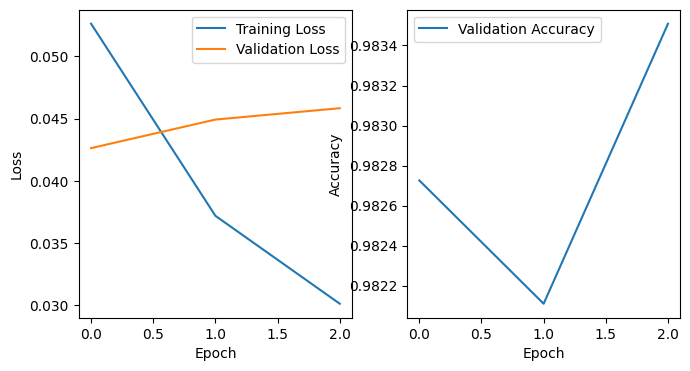

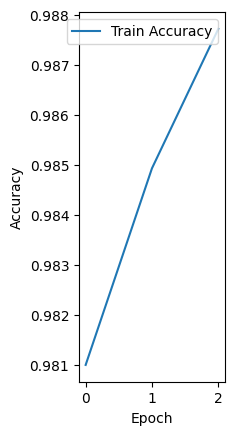

In [199]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
import matplotlib.pyplot as plt

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_accuracy_history = []

def train_model(model, train_loader, val_loader, optimizer, device, num_epochs):
    model.to(device)
    scaler = GradScaler()
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        
        for step, batch in enumerate(train_loader):
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            optimizer.zero_grad()
            with autocast():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            total_loss += loss.item()

            logits = outputs.logits
            predictions = torch.round(torch.sigmoid(logits))
            correct_predictions += torch.sum(predictions == labels).item()
            total_predictions += labels.size(0) * labels.size(1)
            
            if (step + 1) % 100 == 0:
                print(f'Epoch {epoch+1}, Step {step+1}, Training Loss: {loss.item()}')

        train_accuracy = correct_predictions / total_predictions
        train_loss_history.append(total_loss / len(train_loader))
        train_acc_history.append(train_accuracy)
        
        model.eval()
        val_loss = 0
        correct_predictions = 0
        total_predictions = 0
        
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = [t.to(device) for t in batch]
                with autocast():
                    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss
                    val_loss += loss.item()

                    logits = outputs.logits
                    predictions = torch.round(torch.sigmoid(logits))
                    correct_predictions += torch.sum(predictions == labels).item()
                    total_predictions += labels.size(0) * labels.size(1)

        val_accuracy = correct_predictions / total_predictions
        val_loss_history.append(val_loss / len(val_loader))
        val_accuracy_history.append(val_accuracy)
        
        print(f'Epoch {epoch+1}, Training Loss: {train_loss_history[-1]}, Train Accuracy: {train_accuracy}, Validation Loss: {val_loss_history[-1]}, Validation Accuracy: {val_accuracy}')

        if epoch % 2 == 0:
            torch.save(model.state_dict(), f'checkpoint_epoch_{epoch+1}.pt')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(train_loss_history, label='Training Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(val_accuracy_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.subplot(1, 3, 3)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Example call to train_model
train_model(model, train_loader, val_loader, optimizer, device, num_epochs=3)


In [200]:
# Save the fine-tuned model and tokenizer
model.save_pretrained("fine_tuned_model")
tokenizer.save_pretrained("fine_tuned_tokenizer")


('fine_tuned_tokenizer\\tokenizer_config.json',
 'fine_tuned_tokenizer\\special_tokens_map.json',
 'fine_tuned_tokenizer\\vocab.txt',
 'fine_tuned_tokenizer\\added_tokens.json')

In [201]:
len(train_loader)


3990

In [202]:
# Evaluate the Model
def evaluate_model(model, test_loader, device):
    model.eval()  

    true_labels = []
    predicted_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            # Get model's predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            predicted_probs_batch = torch.sigmoid(outputs.logits)  # Use sigmoid for multilabel classification
            predicted_probs.append(predicted_probs_batch.cpu().numpy())

            true_labels_batch = labels.cpu().numpy()
            true_labels.append(true_labels_batch)

    # Combine predictions and labels for evaluation
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_probs = np.concatenate(predicted_probs, axis=0)
    predicted_labels = (predicted_probs > 0.5).astype(int)  # Apply threshold for binary classification

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='micro')
    recall = recall_score(true_labels, predicted_labels, average='micro')

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

# Call the function to evaluate the model on the test data
evaluate_model(model, test_loader, device)

Accuracy: 0.9227
Precision: 0.8231
Recall: 0.7026


In [204]:
def predict_user_input(input_text, model, tokenizer, device):
    # Tokenize the input text
    user_encodings = tokenizer([input_text], truncation=True, padding=True, return_tensors="pt")

    # Create a dataset and dataloader
    user_dataset = TensorDataset(user_encodings['input_ids'], user_encodings['attention_mask'])
    user_loader = DataLoader(user_dataset, batch_size=1, shuffle=False)

    # Set model to evaluation mode and predict
    model.eval()
    with torch.no_grad():
        for batch in user_loader:
            input_ids, attention_mask = [t.to(device) for t in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.sigmoid(logits)
            
    # Convert predictions to binary labels
    predicted_labels = (predictions.cpu().numpy() > 0.5).astype(int)
    return predicted_labels[0].tolist()


In [205]:
# Assuming these are the classes in your dataset
labels = ["toxic", "severe toxic", "obscene", "threat", "insult", "identity hate"]

def interpret_predictions(predictions, labels):
    interpreted = [label for label, pred in zip(labels, predictions) if pred == 1]
    return interpreted if interpreted else ["non-toxic"]

# Example usage
text = "Such an Idiot person"
predicted_labels = predict_user_input(input_text=text, 
                                      model=model, 
                                      tokenizer=tokenizer, 
                                      device=device)
interpreted_labels = interpret_predictions(predicted_labels, labels)
print(interpreted_labels)


['toxic', 'insult']


In [206]:
# Example usage
text = "I'll kill you"
predicted_labels = predict_user_input(input_text=text, 
                                      model=model, 
                                      tokenizer=tokenizer, 
                                      device=device)
interpreted_labels = interpret_predictions(predicted_labels, labels)
print(interpreted_labels)


['toxic', 'threat']


In [207]:
text = "I'll miss you"
predicted_labels = predict_user_input(input_text=text, 
                                      model=model, 
                                      tokenizer=tokenizer, 
                                      device=device)
interpreted_labels = interpret_predictions(predicted_labels, labels)
print(interpreted_labels)


['non-toxic']
